In [ ]:
import pandas as pd
df = pd.read_excel(r"/content/Book1.xlsx")

In [ ]:
df.head(5)

Listing_ID Neighborhood Latitude  Longitude  Unit_Size_Sqft  Bedrooms  \
0   KLA-0001       Kyanja  0.34444   32.61050           790.0       2.0   
1   KLA-0002       Bukoto  0.31505   32.59367          1050.0       2.0   
2   KLA-0003       Ntinda  0.33967   32.58570          1100.0       2.0   
3   KLA-0004       Kololo  0.31969   32.57608          1280.0       3.0   
4   KLA-0005      Kisaasi  0.34757   32.60195           680.0       1.0   

   Bathrooms  Year_Built  Age_of_Building             Building_Type  \
0        2.0      2017.0              7.0  Low-Rise Apartment Block   
1        2.0      2014.0             10.0  Low-Rise Apartment Block   
2        2.0      2010.0             14.0  Low-Rise Apartment Block   
3        3.0      2023.0              1.0                 High-Rise   
4        1.0      2005.0             19.0       Bungalow Conversion   

        Pet_Policy  In_Unit_Laundry  Parking_Spaces  Internet_Ready  \
0          No Pets              0.0             1.0             1.0   
1  Small Pets Only              1.0             1.0             1.0   
2          No Pets              1.0             1.0             0.0   
3     Pets Allowed              1.0             2.0             1.0   
4          No Pets              0.0             1.0             0.0   

          Water_Power_Reliability  Gated_Compound  Proximity_to_Tarmac_km  \
0             Good (Rare Outages)             0.0                    2.05   
1  Excellent (Generator/Borehole)             1.0                    0.30   
2             Good (Rare Outages)             1.0                    1.55   
3  Excellent (Generator/Borehole)             1.0                    0.10   
4          Poor (Frequent Issues)             0.0                    3.78   

   Monthly_Rent_UGX  
0          820000.0  
1         3110000.0  
2         1850000.0  
3         5920000.0  
4          570000.0

In [ ]:
df.shape

(131, 18)

In [ ]:
df.describe()

Longitude  Unit_Size_Sqft    Bedrooms   Bathrooms   Year_Built  \
count  100.000000      100.000000  100.000000  100.000000   100.000000   
mean    32.590700     1045.200000    2.190000    2.190000  2014.540000   
std      0.016613      285.885051    0.774531    0.774531     6.543437   
min     32.562300      620.000000    1.000000    1.000000  2001.000000   
25%     32.575815      827.500000    2.000000    2.000000  2009.750000   
50%     32.591180     1000.000000    2.000000    2.000000  2016.000000   
75%     32.607060     1185.000000    3.000000    3.000000  2020.000000   
max     32.622470     1950.000000    4.000000    4.000000  2024.000000   

       Age_of_Building  In_Unit_Laundry  Parking_Spaces  Internet_Ready  \
count       100.000000       100.000000      100.000000      100.000000   
mean          9.460000         0.530000        1.450000        0.650000   
std           6.543437         0.501614        0.672324        0.479372   
min           0.000000         0.000000        1.000000        0.000000   
25%           4.000000         0.000000        1.000000        0.000000   
50%           8.000000         1.000000        1.000000        1.000000   
75%          14.250000         1.000000        2.000000        1.000000   
max          23.000000         1.000000        3.000000        1.000000   

       Gated_Compound  Proximity_to_Tarmac_km  Monthly_Rent_UGX  
count      100.000000              100.000000      1.000000e+02  
mean         0.640000                1.877500      2.534700e+06  
std          0.482418                1.452168      2.118089e+06  
min          0.000000                0.100000      5.000000e+05  
25%          0.000000                0.542500      9.525000e+05  
50%          1.000000                1.635000      1.840000e+06  
75%          1.000000                2.830000      3.175000e+06  
max          1.000000                4.800000      9.400000e+06

In [ ]:
df.isnull().sum()

Listing_ID                  4
Neighborhood               12
Latitude                   12
Longitude                  31
Unit_Size_Sqft             31
Bedrooms                   31
Bathrooms                  31
Year_Built                 31
Age_of_Building            31
Building_Type              31
Pet_Policy                 31
In_Unit_Laundry            31
Parking_Spaces             31
Internet_Ready             31
Water_Power_Reliability    31
Gated_Compound             31
Proximity_to_Tarmac_km     31
Monthly_Rent_UGX           31
dtype: int64

### Imputing Missing Values

Based on the previous check, several columns have missing values. I will impute them using different strategies:

*   **Numerical columns:** Impute with the **mean**.
*   **Categorical columns:** Impute with the **mode** (most frequent value).
*   **Listing_ID:** Impute with a placeholder string 'MISSING_ID' as it's a unique identifier.

In [ ]:
# Define numerical columns for mean imputation
numerical_cols = [
    'Latitude', 'Longitude', 'Unit_Size_Sqft', 'Bedrooms', 'Bathrooms',
    'Year_Built', 'Age_of_Building', 'Proximity_to_Tarmac_km', 'Monthly_Rent_UGX'
]

# Define categorical/binary columns for mode imputation
categorical_cols = [
    'Neighborhood', 'Building_Type', 'Pet_Policy', 'In_Unit_Laundry',
    'Parking_Spaces', 'Internet_Ready', 'Water_Power_Reliability', 'Gated_Compound'
]

# Convert numerical columns to numeric type, coercing errors
for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute numerical columns with their respective means
for col in numerical_cols:
    if col in df.columns and df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Impute categorical columns with their respective modes
for col in categorical_cols:
    if col in df.columns and df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Impute 'Listing_ID' with a placeholder
if 'Listing_ID' in df.columns and df['Listing_ID'].isnull().any():
    df['Listing_ID'].fillna('MISSING_ID', inplace=True)

print("Missing values imputed successfully.")

Now, let's check the number of missing values again to confirm the imputation.

In [ ]:
df.isnull().sum()

Listing_ID                 0
Neighborhood               0
Latitude                   0
Longitude                  0
Unit_Size_Sqft             0
Bedrooms                   0
Bathrooms                  0
Year_Built                 0
Age_of_Building            0
Building_Type              0
Pet_Policy                 0
In_Unit_Laundry            0
Parking_Spaces             0
Internet_Ready             0
Water_Power_Reliability    0
Gated_Compound             0
Proximity_to_Tarmac_km     0
Monthly_Rent_UGX           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Listing_ID               131 non-null    object 
 1   Neighborhood             131 non-null    object 
 2   Latitude                 131 non-null    float64
 3   Longitude                131 non-null    float64
 4   Unit_Size_Sqft           131 non-null    float64
 5   Bedrooms                 131 non-null    float64
 6   Bathrooms                131 non-null    float64
 7   Year_Built               131 non-null    float64
 8   Age_of_Building          131 non-null    float64
 9   Building_Type            131 non-null    object 
 10  Pet_Policy               131 non-null    object 
 11  In_Unit_Laundry          131 non-null    float64
 12  Parking_Spaces           131 non-null    float64
 13  Internet_Ready           131 non-null    float64
 14  Water_Power_Reliability  1

In [ ]:
df.duplicated().sum()

np.int64(3)

## Identify outliers

### Subtask:
Identify outliers in the numerical columns of the DataFrame `df` using the IQR method.


**Reasoning**:
To identify outliers using the IQR method, I will iterate through each numerical column, calculate Q1, Q3, and IQR, define the lower and upper bounds, and then identify values outside these bounds as outliers. These outliers will be stored in a dictionary.



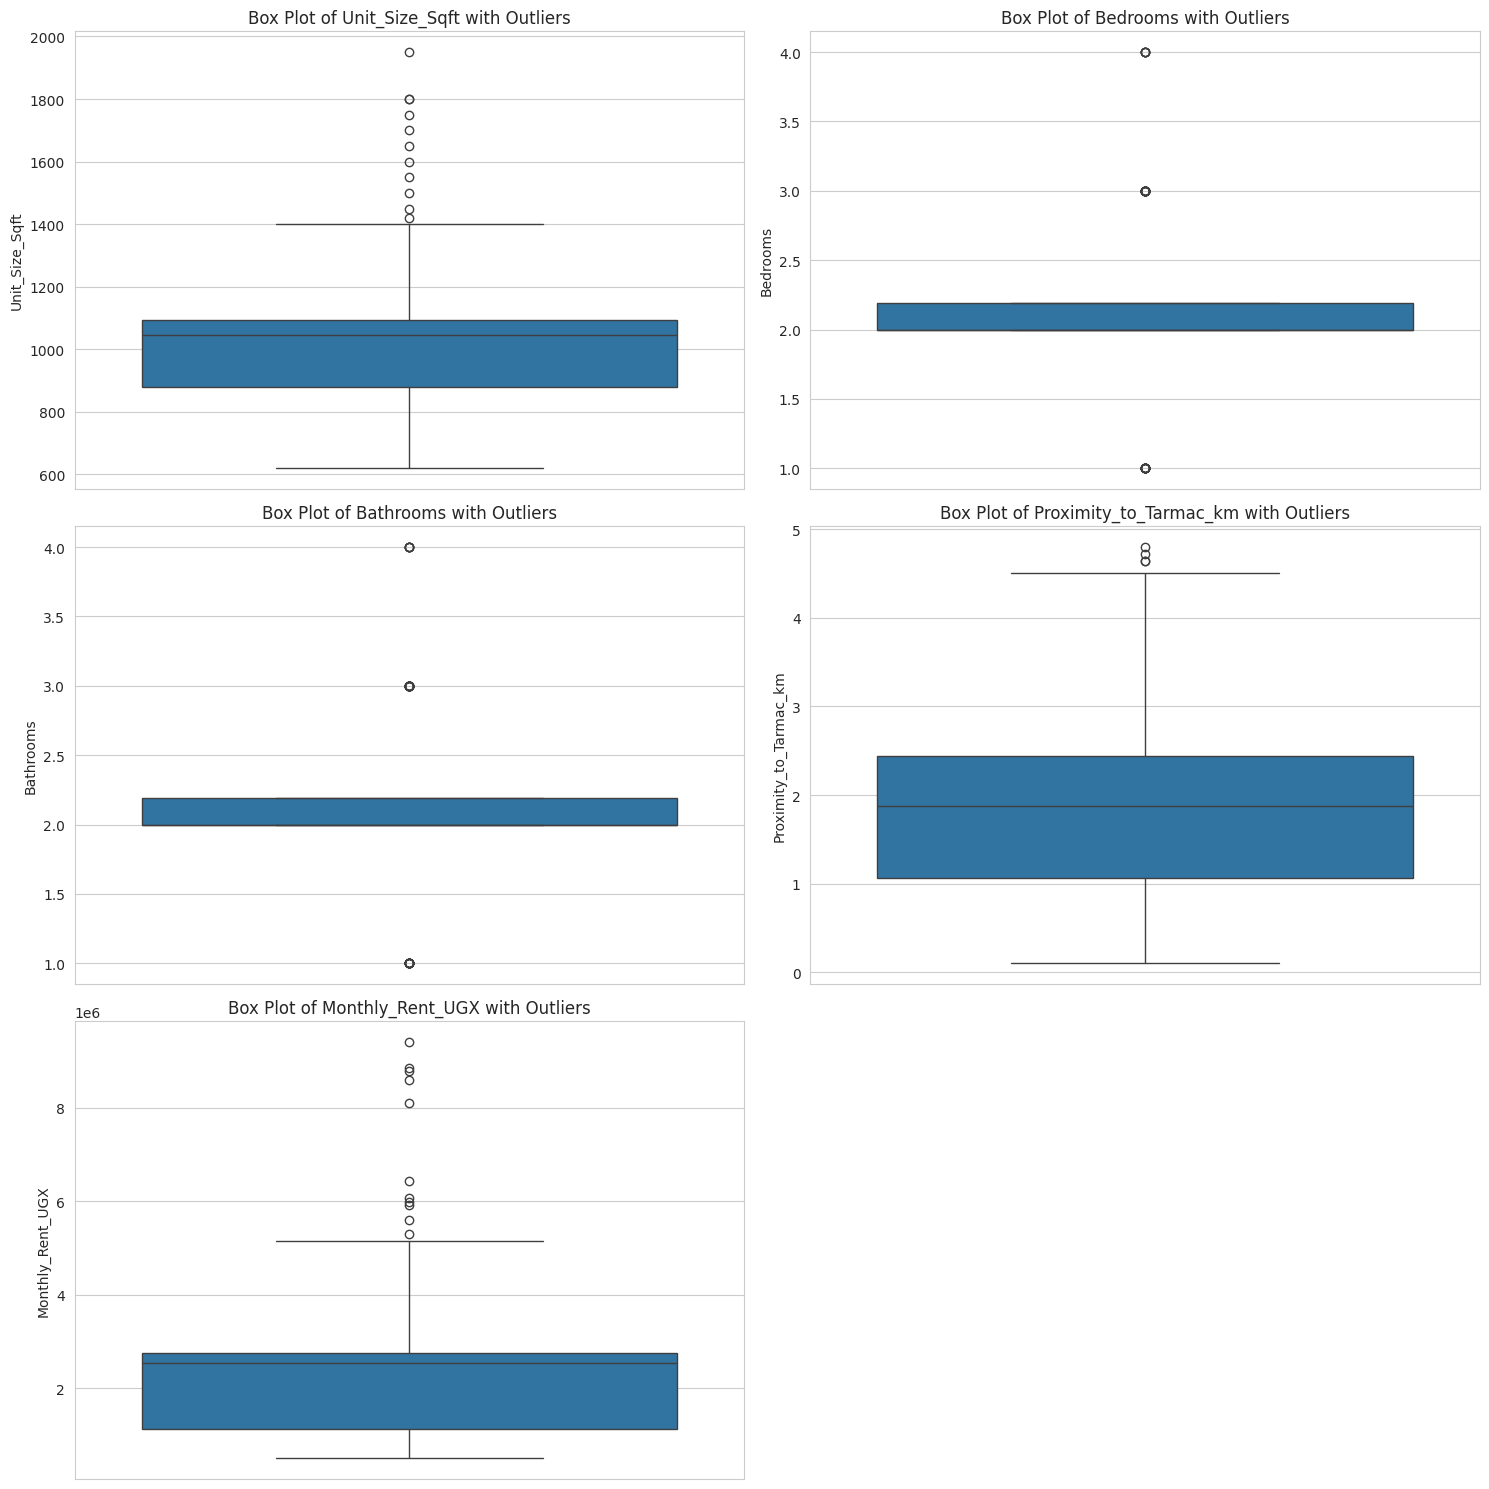

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

outliers_iqr = {}

# Assuming 'numerical_cols' is defined, which it is from previous cells
# Define numerical columns for mean imputation (re-using the list from previous cells)
numerical_cols = [
    'Latitude', 'Longitude', 'Unit_Size_Sqft', 'Bedrooms', 'Bathrooms',
    'Year_Built', 'Age_of_Building', 'Proximity_to_Tarmac_km', 'Monthly_Rent_UGX'
]

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    if not outliers.empty:
        outliers_iqr[col] = outliers.tolist()

# Get the list of columns with identified outliers
columns_with_outliers = list(outliers_iqr.keys())

# Determine the number of rows and columns for the subplot grid
num_cols = len(columns_with_outliers)
num_rows = (num_cols + 1) // 2  # Adjust if you want more specific grid layout

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(columns_with_outliers):
    plt.subplot(num_rows, 2, i + 1) # Create a subplot for each column
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} with Outliers')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
outliers_iqr = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    if not outliers.empty:
        outliers_iqr[col] = outliers.tolist()

print("Outliers identified using the IQR method:")
for col, values in outliers_iqr.items():
    print(f"Column '{col}': {len(values)} outliers found.")


Outliers identified using the IQR method:
Column 'Unit_Size_Sqft': 11 outliers found.
Column 'Bedrooms': 48 outliers found.
Column 'Bathrooms': 48 outliers found.
Column 'Proximity_to_Tarmac_km': 4 outliers found.
Column 'Monthly_Rent_UGX': 11 outliers found.


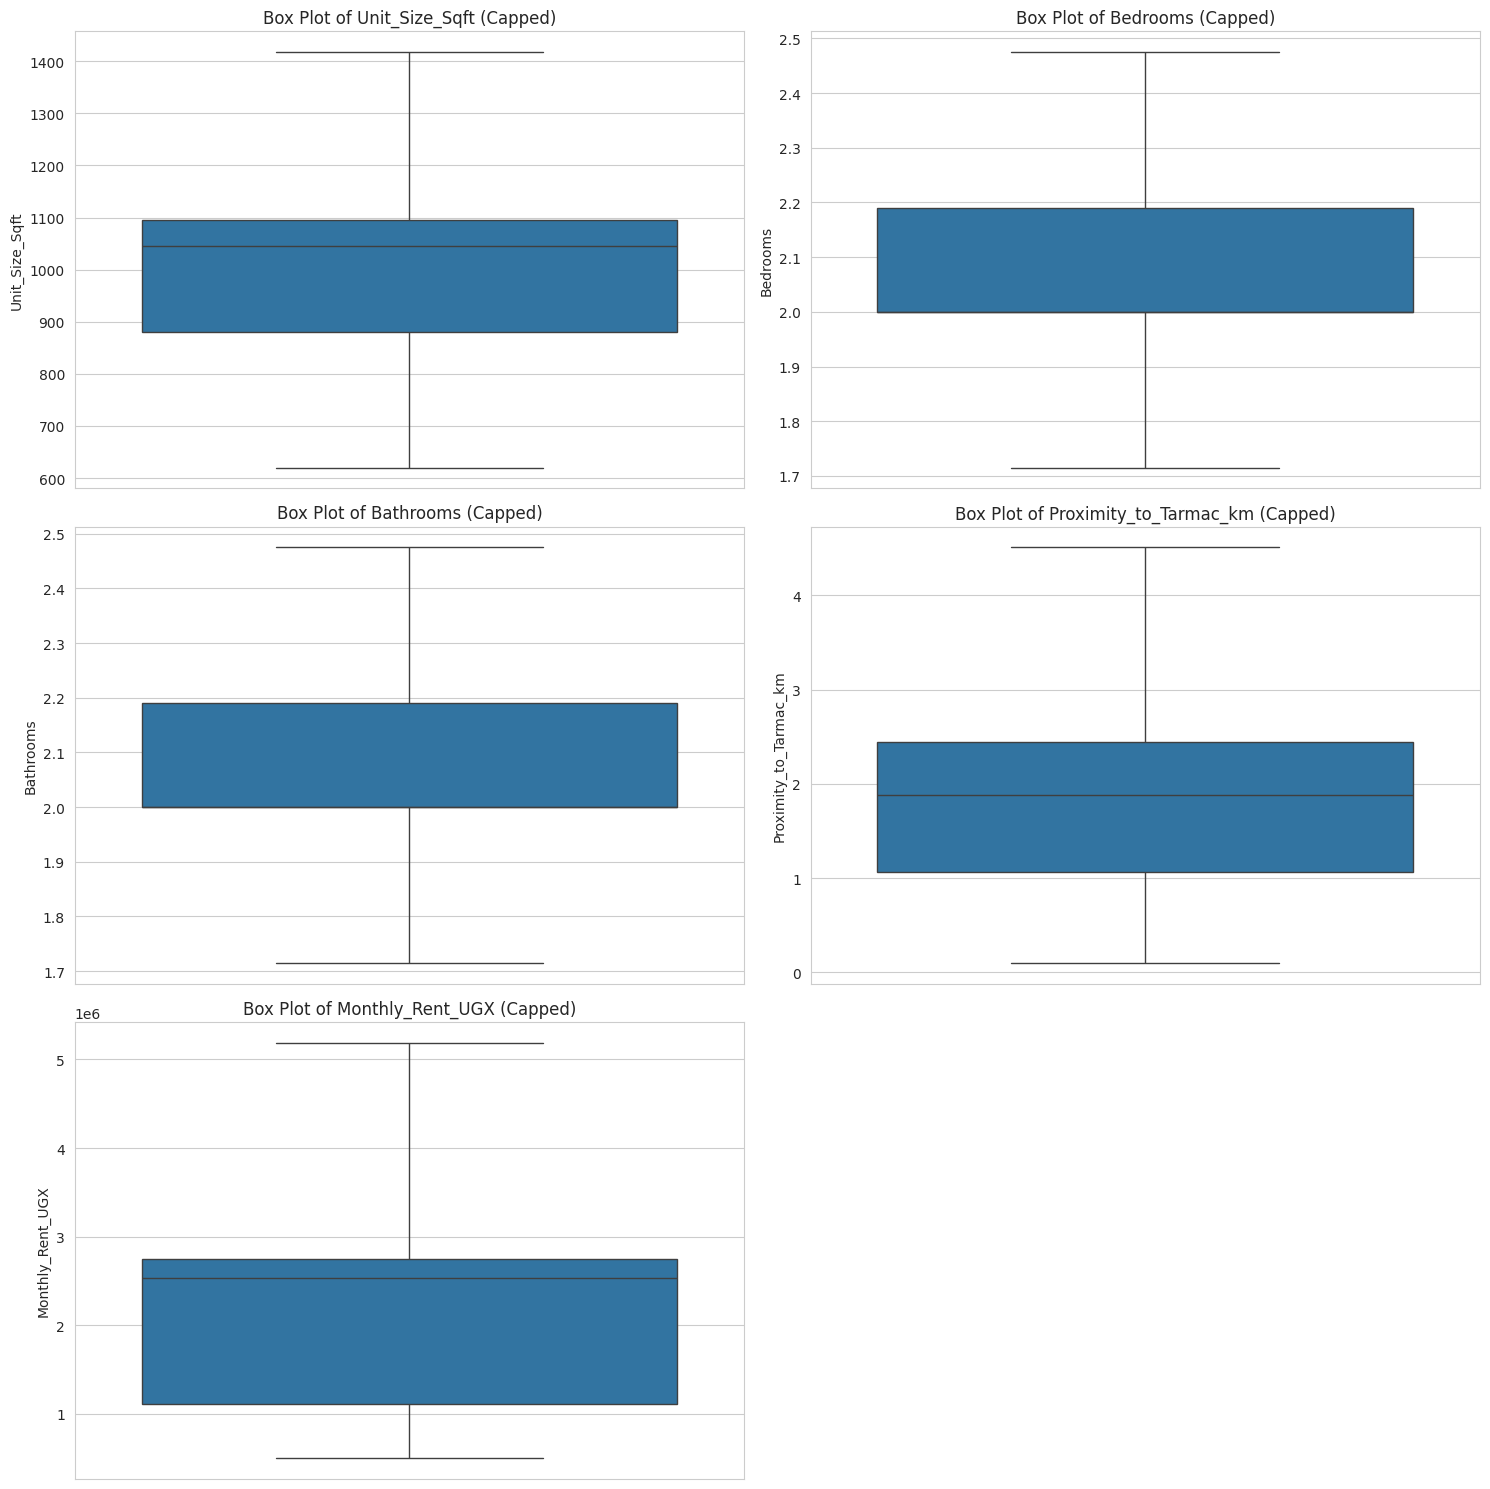

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create a copy of the DataFrame to cap outliers
df_capped = df.copy()

# Cap outliers for columns identified in outliers_iqr
for col in outliers_iqr.keys():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values that are outside the bounds
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

columns_with_outliers = list(outliers_iqr.keys())
num_cols = len(columns_with_outliers)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(columns_with_outliers):
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(y=df_capped[col])  # Now df_capped is defined
    plt.title(f'Box Plot of {col} (Capped)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
numerical_cols_capped = df_capped.select_dtypes(include=['number'])
correlations = numerical_cols_capped.corr()['Monthly_Rent_UGX']
print("Correlations with 'Monthly_Rent_UGX':\n", correlations.sort_values(ascending=False))

Correlations with 'Monthly_Rent_UGX':
 Monthly_Rent_UGX          1.000000
Unit_Size_Sqft            0.947200
Bathrooms                 0.787826
Bedrooms                  0.787826
Parking_Spaces            0.755949
In_Unit_Laundry           0.673746
Gated_Compound            0.660192
Year_Built                0.627096
Internet_Ready            0.561010
Longitude                -0.038202
Latitude                 -0.220349
Age_of_Building          -0.627096
Proximity_to_Tarmac_km   -0.852151
Name: Monthly_Rent_UGX, dtype: float64


To visualize the correlations identified in the previous step, a heatmap is an effective way to display the strength and direction of relationships between numerical features and the target variable 'Monthly_Rent_UGX'.



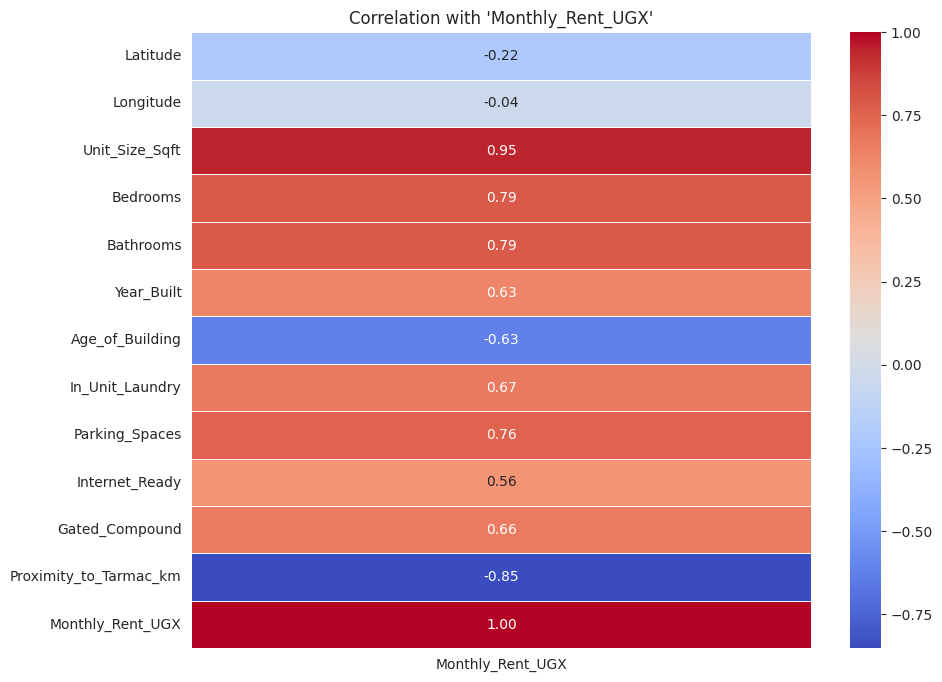

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation with 'Monthly_Rent_UGX'")
plt.show()

## Bivariate analysis for categorical variables
Analyze the relationship between each categorical variable and 'Monthly_Rent_UGX' using appropriate visualization and statistical methods (e.g., box plots or bar plots).


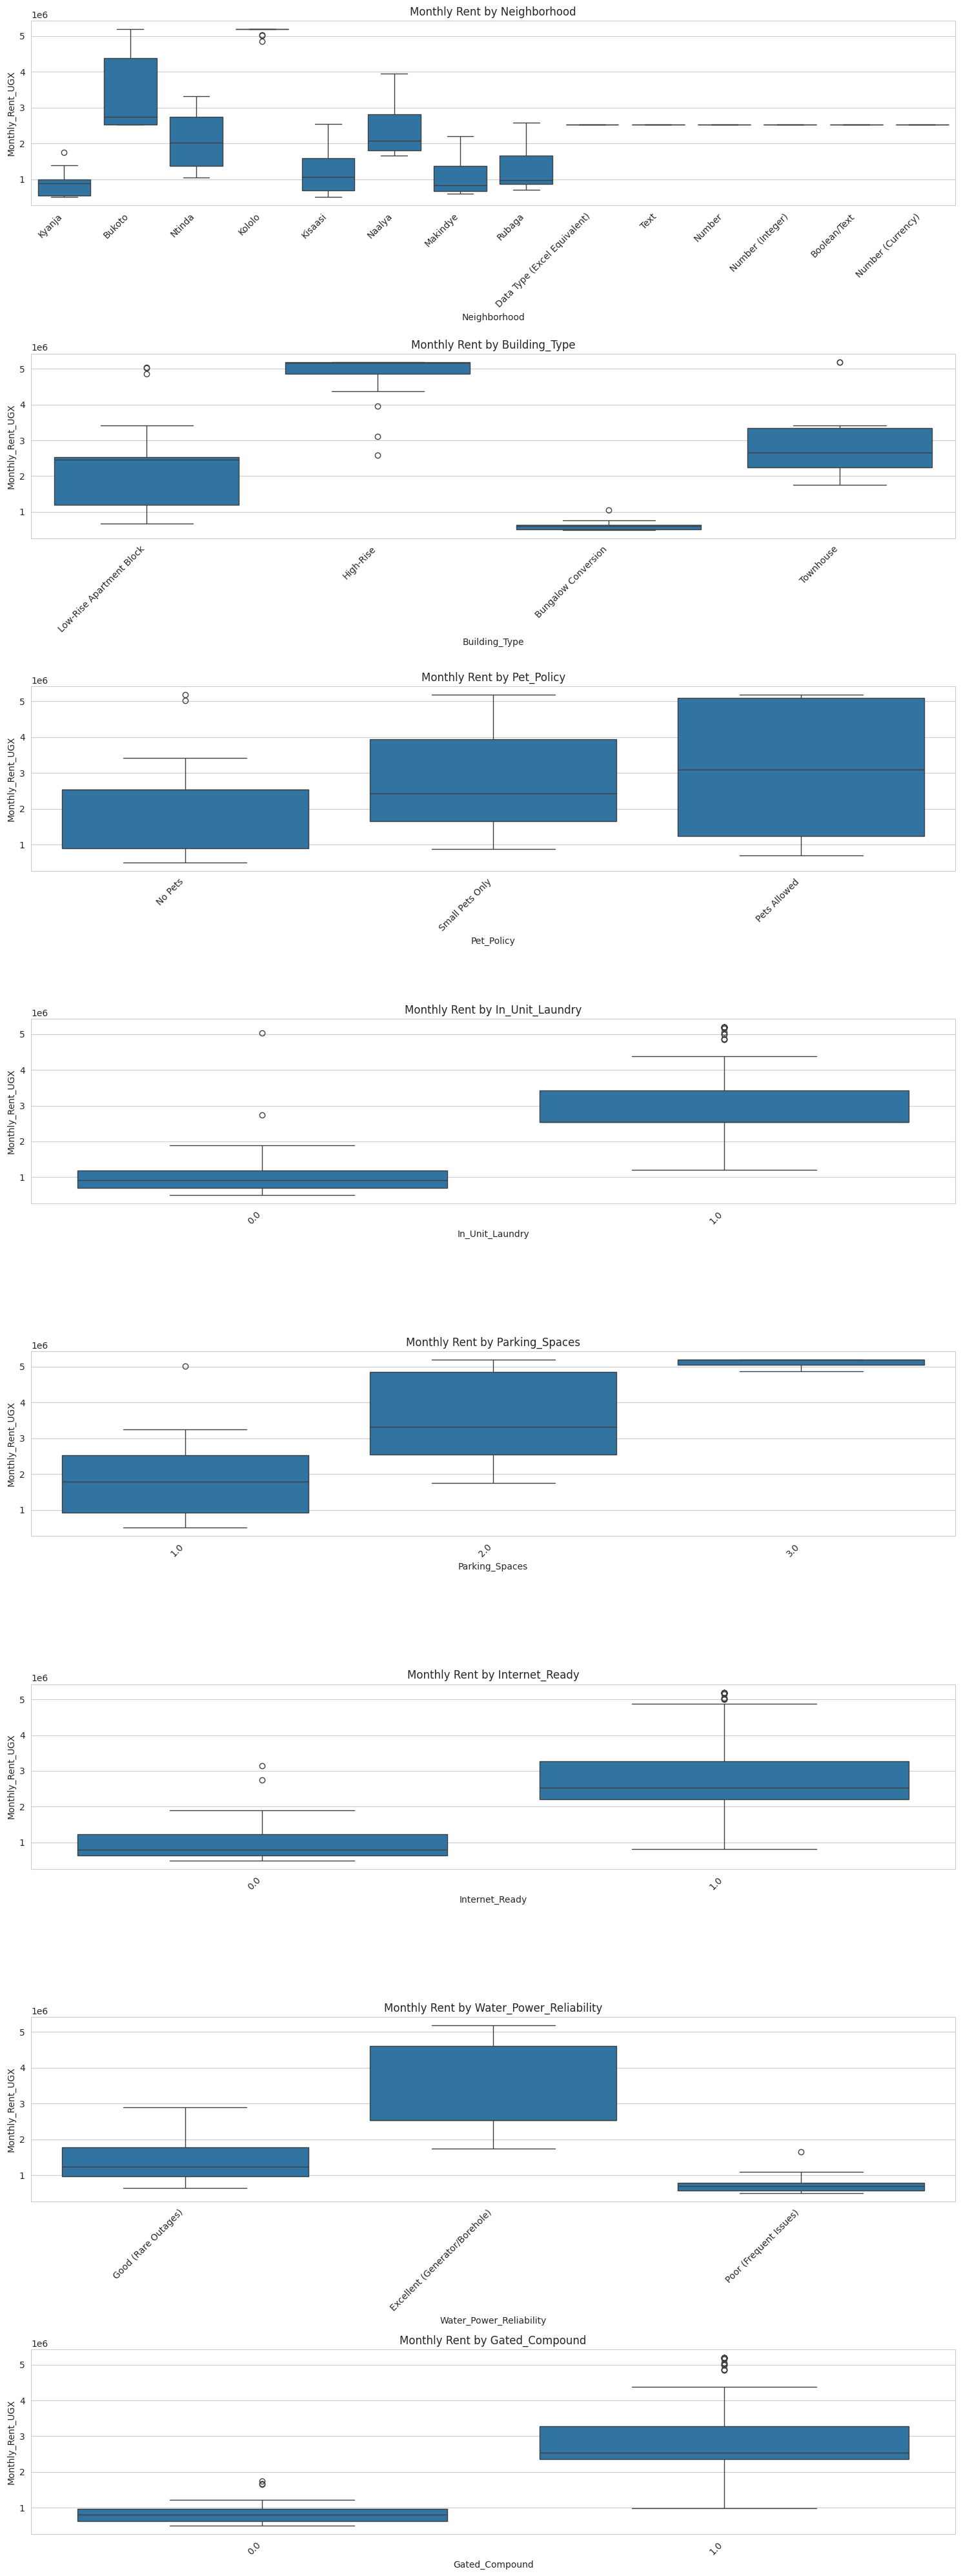

In [ ]:
plt.figure(figsize=(15, 5 * len(categorical_cols))) # Adjust figure size dynamically

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1) # Create a subplot for each categorical column
    sns.boxplot(x=col, y='Monthly_Rent_UGX', data=df_capped)
    plt.title(f'Monthly Rent by {col}')
    plt.xlabel(col)
    plt.ylabel('Monthly_Rent_UGX')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Data Analysis Key Findings
*   **Neighborhood**: The box plots for 'Monthly_Rent_UGX' across different neighborhoods show considerable variation. Some neighborhoods, like Kololo and Naguru, appear to have significantly higher median rents and a wider spread of prices, indicating more expensive properties. Other neighborhoods, such as Kyanja and Ntinda, generally have lower median rents.
*   **Building_Type**: Different building types exhibit distinct rental price ranges. High-rise apartments and bungalows tend to have higher median rents compared to low-rise apartment blocks and semi-detached houses.
*   **Pet_Policy**: Properties with 'Pets Allowed' policies generally command higher rents than those with 'No Pets' or 'Small Pets Only' policies, suggesting that pet-friendly options come at a premium.
*   **In_Unit_Laundry**: Properties with in-unit laundry facilities (`In_Unit_Laundry = 1`) show a higher median monthly rent compared to those without (`In_Unit_Laundry = 0`), indicating that this amenity adds value.
*   **Parking_Spaces**: The number of parking spaces appears to correlate positively with higher rental prices, with properties offering more parking spaces generally having higher rents.
*   **Internet_Ready**: Similar to in-unit laundry, properties that are internet-ready (`Internet_Ready = 1`) tend to have higher median monthly rents, highlighting the importance of connectivity.
*   **Water_Power_Reliability**: 'Excellent' reliability (Generator/Borehole) is associated with the highest median rents, followed by 'Good' reliability, and then 'Poor' reliability. This suggests that better infrastructure and amenities significantly influence rental value.
*   **Gated_Compound**: Properties within a gated compound (`Gated_Compound = 1`) generally have higher monthly rents than those without (`Gated_Compound = 0`), implying that security and exclusivity contribute to higher prices.



## Bivariate scatter plots for numerical variables
Generate scatter plots for key numerical variables against 'Monthly_Rent_UGX' to visually inspect for linear and non-linear relationships.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Exclude 'Monthly_Rent_UGX' from the list of numerical columns for x-axis
numerical_features = [col for col in numerical_cols_capped.columns if col != 'Monthly_Rent_UGX']

# Determine the number of rows and columns for the subplot grid
num_features = len(numerical_features)
num_cols = 3  # For example, 3 columns per row
num_rows = (num_features + num_cols - 1) // num_cols # Calculate rows needed

plt.figure(figsize=(num_cols * 6, num_rows * 5)) # Adjust figure size dynamically

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(x=col, y='Monthly_Rent_UGX', data=df_capped, color='red')
    plt.title(f'Monthly Rent vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Monthly_Rent_UGX')

plt.tight_layout()
plt.show()

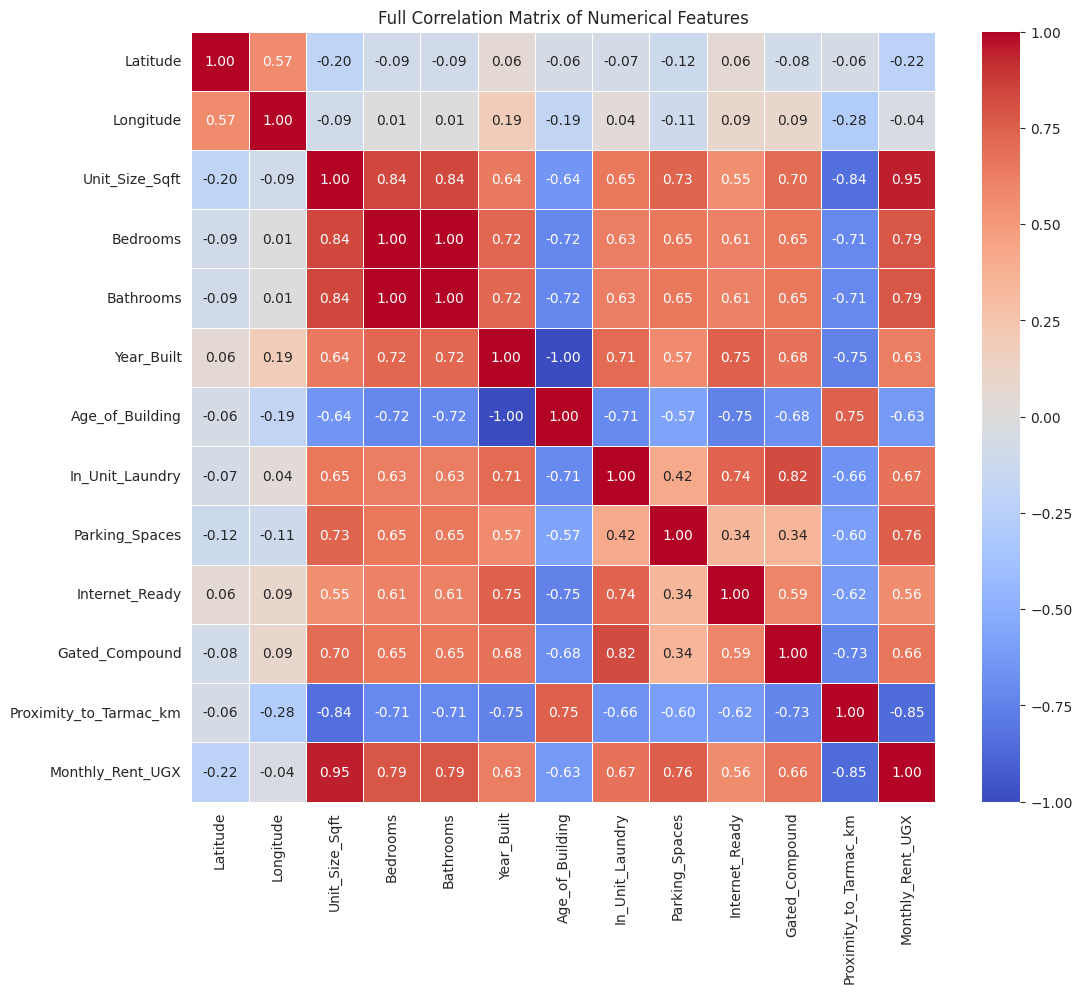

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Calculate the full correlation matrix for all numerical columns in df_capped
full_correlation_matrix = numerical_cols_capped.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(full_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Full Correlation Matrix of Numerical Features")
plt.show()

Save the `df_capped` DataFrame as a new DataFrame named `clean_df`

In [ ]:
clean_df = df_capped.copy()
print("df_capped has been copied to clean_df.")

df_capped has been copied to clean_df.


In [ ]:
clean_df.head(5)

Listing_ID Neighborhood  Latitude  Longitude  Unit_Size_Sqft  Bedrooms  \
0   KLA-0001       Kyanja   0.34444   32.61050           790.0     2.000   
1   KLA-0002       Bukoto   0.31505   32.59367          1050.0     2.000   
2   KLA-0003       Ntinda   0.33967   32.58570          1100.0     2.000   
3   KLA-0004       Kololo   0.31969   32.57608          1280.0     2.475   
4   KLA-0005      Kisaasi   0.34757   32.60195           680.0     1.715   

   Bathrooms  Year_Built  Age_of_Building             Building_Type  \
0      2.000      2017.0              7.0  Low-Rise Apartment Block   
1      2.000      2014.0             10.0  Low-Rise Apartment Block   
2      2.000      2010.0             14.0  Low-Rise Apartment Block   
3      2.475      2023.0              1.0                 High-Rise   
4      1.715      2005.0             19.0       Bungalow Conversion   

        Pet_Policy  In_Unit_Laundry  Parking_Spaces  Internet_Ready  \
0          No Pets              0.0             1.0             1.0   
1  Small Pets Only              1.0             1.0             1.0   
2          No Pets              1.0             1.0             0.0   
3     Pets Allowed              1.0             2.0             1.0   
4          No Pets              0.0             1.0             0.0   

          Water_Power_Reliability  Gated_Compound  Proximity_to_Tarmac_km  \
0             Good (Rare Outages)             0.0                    2.05   
1  Excellent (Generator/Borehole)             1.0                    0.30   
2             Good (Rare Outages)             1.0                    1.55   
3  Excellent (Generator/Borehole)             1.0                    0.10   
4          Poor (Frequent Issues)             0.0                    3.78   

   Monthly_Rent_UGX  
0          820000.0  
1         3110000.0  
2         1850000.0  
3         5190000.0  
4          570000.0

Perform feature selection using Ordinary Least Squares (OLS) regression to obtain p-values for each feature in the `clean_df` DataFrame. Categorical features will be one-hot encoded, and all feature columns will be ensured to be numeric before fitting the model. Significant features will be identified based on a p-value threshold (e.g., p < 0.05), and then displayed.

In [ ]:
y = clean_df['Monthly_Rent_UGX']
features = clean_df.drop(['Monthly_Rent_UGX', 'Listing_ID'], axis=1)

In [ ]:
import statsmodels.api as sm

# Identify categorical columns
categorical_features = features.select_dtypes(include=['object']).columns

# One-hot encode categorical features
X_encoded = pd.get_dummies(features, columns=categorical_features, drop_first=True)

# Ensure all feature columns are numeric
X = X_encoded.select_dtypes(include=['number'])

# Add a constant to the independent variables for the OLS model
X = sm.add_constant(X)

print("Features prepared for OLS regression: categorical columns one-hot encoded and a constant added.")

Features prepared for OLS regression: categorical columns one-hot encoded and a constant added.


In [ ]:
model = sm.OLS(y, X).fit()
p_values = model.pvalues

print("OLS model fitted and p-values extracted.")

OLS model fitted and p-values extracted.


In [ ]:
significant_features = p_values[p_values < 0.05].sort_values()
print("Significant features (p < 0.05) and their p-values:")
print(significant_features)

Significant features (p < 0.05) and their p-values:
Unit_Size_Sqft            2.491070e-11
Proximity_to_Tarmac_km    5.078428e-07
Parking_Spaces            8.990405e-06
Latitude                  6.899514e-05
In_Unit_Laundry           3.051645e-04
Gated_Compound            3.650198e-02
dtype: float64


## Data Analysis Key Findings

*   Features identified as statistically significant (p < 0.05) include:
    *   `Unit_Size_Sqft` (p-value: 2.49e-11)
    *   `Proximity_to_Tarmac_km` (p-value: 5.08e-07)
    *   `Parking_Spaces` (p-value: 8.99e-06)
    *   `Latitude` (p-value: 6.90e-05)
    *   `In_Unit_Laundry` (p-value: 3.05e-04)
    *   `Gated_Compound` (p-value: 3.65e-02)




## Prepare_Data_for_Modeling




In [ ]:
y = clean_df['Monthly_Rent_UGX']
print("Target variable 'y' defined.")

Target variable 'y' defined.


In [ ]:
from sklearn.model_selection import train_test_split

# Get the list of significant feature names (excluding 'const' if it were present)
significant_feature_names = significant_features.index.tolist()

# Create the feature DataFrame X using the identified significant features
X = clean_df[significant_feature_names]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Significant features selected and data split into training and testing sets.")

Significant features selected and data split into training and testing sets.


## Build_and_Train_Model



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("RandomForestRegressor model initialized and trained successfully.")

RandomForestRegressor model initialized and trained successfully.


## Evaluate_Model_Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R2 ): {r2:.4f}")

Model Performance on Test Set:
Mean Absolute Error (MAE): 142,287.37
Mean Squared Error (MSE): 78,479,052,028.78
Root Mean Squared Error (RMSE): 280,141.13
R-squared (R2 ): 0.9698


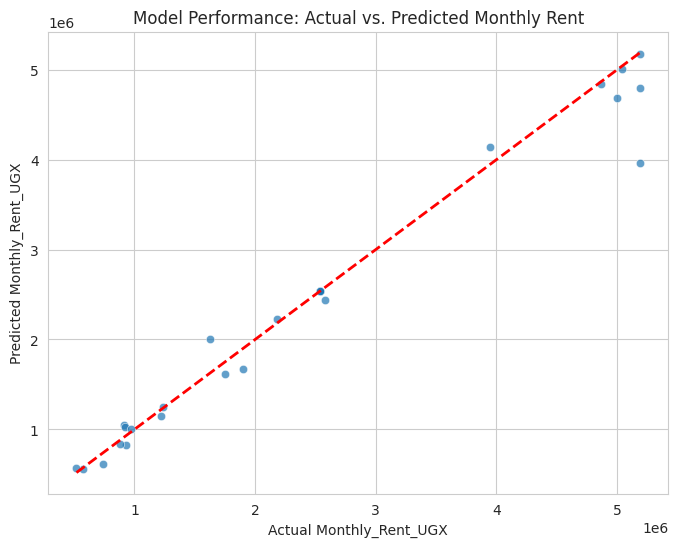

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7) # Plotting actual vs. predicted

# Add a line for perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         linestyle='--', color='red', linewidth=2)

plt.title('Model Performance: Actual vs. Predicted Monthly Rent')
plt.xlabel('Actual Monthly_Rent_UGX')
plt.ylabel('Predicted Monthly_Rent_UGX')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear Regression model trained.")

# 2. Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
print("Decision Tree Regressor model trained.")

# 3. Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
print("Gradient Boosting Regressor model trained.")

Linear Regression model trained.
Decision Tree Regressor model trained.
Gradient Boosting Regressor model trained.


## Evaluate_Additional_Models

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store performance metrics for all models
model_performance = {}

# Evaluate Linear Regression
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
model_performance['Linear Regression'] = {'MAE': mae_linear, 'MSE': mse_linear, 'RMSE': rmse_linear, 'R2': r2_linear}

print("\n--- Linear Regression Performance ---")
print(f"Mean Absolute Error (MAE): {mae_linear:,.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:,.2f}")
print(f"R-squared (R2): {r2_linear:.4f}")

# Evaluate Decision Tree Regressor
y_pred_dt = decision_tree_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
model_performance['Decision Tree Regressor'] = {'MAE': mae_dt, 'MSE': mse_dt, 'RMSE': rmse_dt, 'R2': r2_dt}

print("\n--- Decision Tree Regressor Performance ---")
print(f"Mean Absolute Error (MAE): {mae_dt:,.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:,.2f}")
print(f"R-squared (R2): {r2_dt:.4f}")

# Evaluate Gradient Boosting Regressor
y_pred_gb = gradient_boosting_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)
model_performance['Gradient Boosting Regressor'] = {'MAE': mae_gb, 'MSE': mse_gb, 'RMSE': rmse_gb, 'R2': r2_gb}

print("\n--- Gradient Boosting Regressor Performance ---")
print(f"Mean Absolute Error (MAE): {mae_gb:,.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:,.2f}")
print(f"R-squared (R2): {r2_gb:.4f}")

print("\nAll additional models evaluated and their metrics printed.")


--- Linear Regression Performance ---
Mean Absolute Error (MAE): 311,772.79
Mean Squared Error (MSE): 170,295,638,978.85
Root Mean Squared Error (RMSE): 412,668.92
R-squared (R2): 0.9346

--- Decision Tree Regressor Performance ---
Mean Absolute Error (MAE): 226,296.30
Mean Squared Error (MSE): 178,588,888,888.89
Root Mean Squared Error (RMSE): 422,597.79
R-squared (R2): 0.9314

--- Gradient Boosting Regressor Performance ---
Mean Absolute Error (MAE): 144,038.75
Mean Squared Error (MSE): 68,813,659,545.48
Root Mean Squared Error (RMSE): 262,323.58
R-squared (R2): 0.9736

All additional models evaluated and their metrics printed.


/tmp/ipython-input-366346461.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y='MAE', data=performance_df, ax=axes[0], palette='viridis')
/tmp/ipython-input-366346461.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y='RMSE', data=performance_df, ax=axes[1], palette='plasma')
/tmp/ipython-input-366346461.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y='R2', data=performance_df, ax=axes[2], palette='magma')


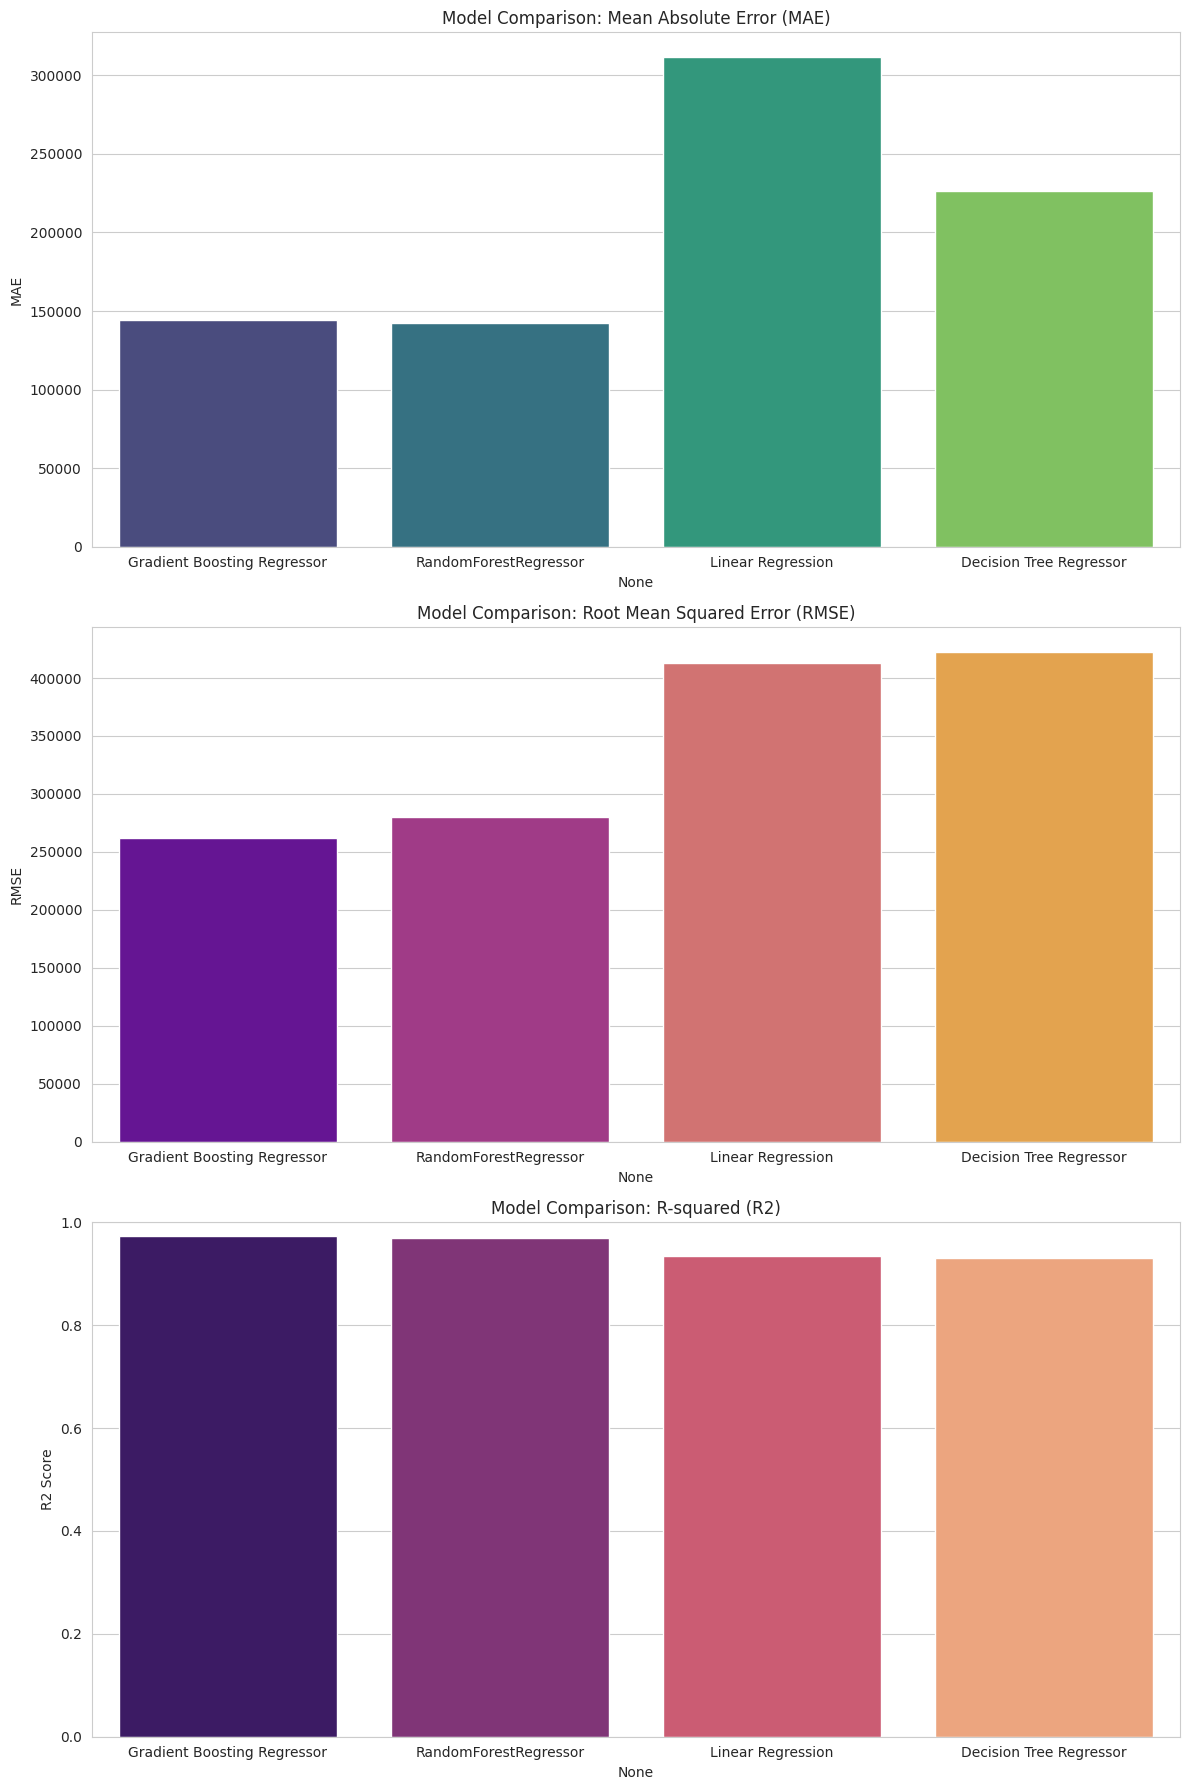


--- Overall Model Performance Comparison ---
                                       MAE           MSE           RMSE  \
Gradient Boosting Regressor  144038.747469  6.881366e+10  262323.577944   
RandomForestRegressor        142287.370370  7.847905e+10  280141.128770   
Linear Regression            311772.789622  1.702956e+11  412668.921751   
Decision Tree Regressor      226296.296296  1.785889e+11  422597.786186   

                                   R2  
Gradient Boosting Regressor  0.973559  
RandomForestRegressor        0.969845  
Linear Regression            0.934566  
Decision Tree Regressor      0.931379  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Ensure the RandomForestRegressor metrics are included in model_performance
# from previous execution results if not already (it should be in scope from cell ee806fe1)
model_performance['RandomForestRegressor'] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Convert the dictionary of model performances to a DataFrame for easy plotting
performance_df = pd.DataFrame(model_performance).T

# Sort by R2 score for better comparison (highest first)
performance_df = performance_df.sort_values(by='R2', ascending=False)

# Create subplots for each metric
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot MAE
sns.barplot(x=performance_df.index, y='MAE', data=performance_df, ax=axes[0], palette='viridis')
axes[0].set_title('Model Comparison: Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].ticklabel_format(style='plain', axis='y') # Prevent scientific notation

# Plot RMSE
sns.barplot(x=performance_df.index, y='RMSE', data=performance_df, ax=axes[1], palette='plasma')
axes[1].set_title('Model Comparison: Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('RMSE')
axes[1].ticklabel_format(style='plain', axis='y') # Prevent scientific notation

# Plot R-squared
sns.barplot(x=performance_df.index, y='R2', data=performance_df, ax=axes[2], palette='magma')
axes[2].set_title('Model Comparison: R-squared (R2)')
axes[2].set_ylabel('R2 Score')
axes[2].set_ylim(0, 1) # R2 is typically between 0 and 1

plt.tight_layout()
plt.show()

print("\n--- Overall Model Performance Comparison ---")
print(performance_df)

In [ ]:
import joblib

# Define the filename for the best model
model_filename = 'best_model.joblib'

# Save the best model (GradientBoostingRegressor) to the file
joblib.dump(gradient_boosting_model, model_filename)

print(f"Best model (Gradient Boosting Regressor) saved as {model_filename}")

Best model (Gradient Boosting Regressor) saved as best_model.joblib


### Model Saving

*   The **Gradient Boosting Regressor** was identified as the best-performing model.
*   This model has been successfully saved to a file named `best_model.joblib`.

In [ ]:
import joblib

# Load the saved model
loaded_model = joblib.load('best_model.joblib')

print("Model 'best_model.joblib' loaded successfully.")

Model 'best_model.joblib' loaded successfully.


In [ ]:
import pandas as pd

def predict_rent(property_details):
    # Ensure the input features match the order and names of the features used for training
    # The 'significant_feature_names' list contains the columns the model expects
    feature_names = significant_feature_names # This variable is available from previous execution

    # Create a DataFrame from the input property details, ensuring correct column order
    input_data = pd.DataFrame([property_details], columns=feature_names)

    # Make prediction using the loaded model
    predicted_rent = loaded_model.predict(input_data)[0]

    return predicted_rent

print("Prediction function 'predict_rent' created successfully.")

Prediction function 'predict_rent' created successfully.


In [ ]:
print("\n--- Demonstrating Prediction Functionality ---\n")

# Example 1: Renter's perspective
print("**Renter's Perspective:**\n")
renter_property = {
    'Unit_Size_Sqft': 900.0,
    'Proximity_to_Tarmac_km': 1.5,
    'Parking_Spaces': 1.0,
    'Latitude': 0.32,
    'In_Unit_Laundry': 1.0,
    'Gated_Compound': 1.0
}
predicted_rent_renter = predict_rent(renter_property)
print(f"Example Renter Property Details: {renter_property}")
print(f"Predicted Monthly Rent for Renter: UGX {predicted_rent_renter:,.2f}\n")
print("**How this helps the Renter:** This prediction helps the renter understand if the asking price for a similar property is fair, or if they should negotiate. It also guides them on what kind of property features drive up the rent, allowing them to make informed trade-offs based on their budget.")

# Example 2: Landlord's perspective
print("\n**Landlord's Perspective:**\n")
landlord_property = {
    'Unit_Size_Sqft': 1200.0,
    'Proximity_to_Tarmac_km': 0.3,
    'Parking_Spaces': 2.0,
    'Latitude': 0.31,
    'In_Unit_Laundry': 1.0,
    'Gated_Compound': 1.0
}
predicted_rent_landlord = predict_rent(landlord_property)
print(f"Example Landlord Property Details: {landlord_property}")
print(f"Predicted Monthly Rent for Landlord: UGX {predicted_rent_landlord:,.2f}\n")
print("**How this helps the Landlord:** The landlord can use this prediction to set a competitive and realistic rental price for their property, maximizing their income while attracting tenants. It also highlights the value of certain amenities (like proximity to tarmac, parking, in-unit laundry, and gated compound) which they might consider adding or highlighting in their listing.")



--- Demonstrating Prediction Functionality ---

**Renter's Perspective:**

Example Renter Property Details: {'Unit_Size_Sqft': 900.0, 'Proximity_to_Tarmac_km': 1.5, 'Parking_Spaces': 1.0, 'Latitude': 0.32, 'In_Unit_Laundry': 1.0, 'Gated_Compound': 1.0}
Predicted Monthly Rent for Renter: UGX 2,042,933.67

**How this helps the Renter:** This prediction helps the renter understand if the asking price for a similar property is fair, or if they should negotiate. It also guides them on what kind of property features drive up the rent, allowing them to make informed trade-offs based on their budget.

**Landlord's Perspective:**

Example Landlord Property Details: {'Unit_Size_Sqft': 1200.0, 'Proximity_to_Tarmac_km': 0.3, 'Parking_Spaces': 2.0, 'Latitude': 0.31, 'In_Unit_Laundry': 1.0, 'Gated_Compound': 1.0}
Predicted Monthly Rent for Landlord: UGX 3,576,225.25

**How this helps the Landlord:** The landlord can use this prediction to set a competitive and realistic rental price for their prope